## EX NO:

## DATE:

## <center>**Time Series analysis-1**</center>


## AIM:

To write a python code to build and evaluate Autoregressive(AR), Moving Average(MA) models using different parameters

## PROGRAM:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### Load dataset

In [ ]:
data = pd.read_csv('temperature.csv', parse_dates=['Date'], index_col='Date')
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [ ]:
data = data.sort_index(ascending=False)

### Visualize data

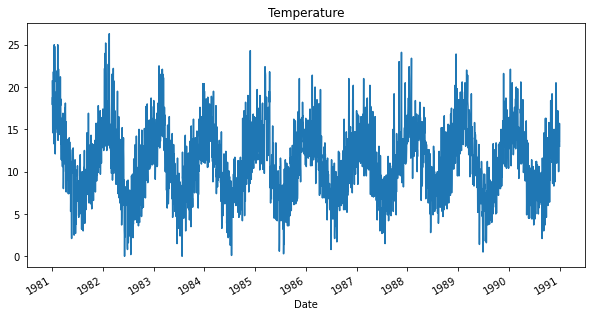

In [ ]:
data['Temp'].plot(title='Temperature', figsize=(10, 5))
plt.show()

## Additive Seasonality

### Decompose time series

In [ ]:
result = seasonal_decompose(data['Temp'], model='additive', period=30)

### Plot components

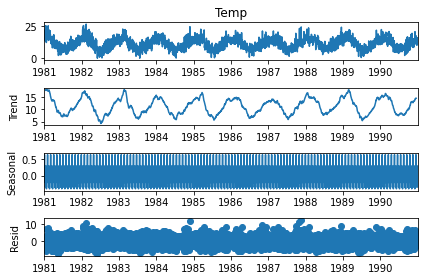

In [ ]:
result.plot()
plt.show()

It works for additive model but not multiplicative model. Since Multiplicative seasonality is not appropriate for zero and negative values.

## Moving Average for Smoothing and Forecasting

### Compute moving averages

In [ ]:
data['MA_7'] = data['Temp'].rolling(window=7).mean()
data['MA_30'] = data['Temp'].rolling(window=30).mean()
data['MA_90'] = data['Temp'].rolling(window=90).mean()

### Plot

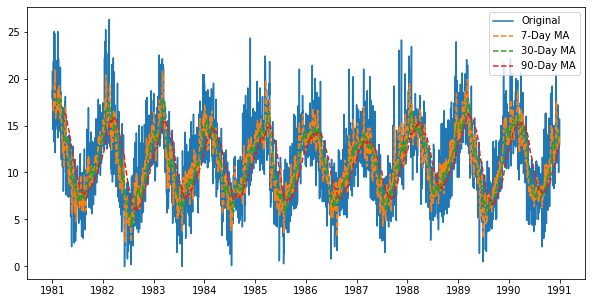

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['MA_7'], label='7-Day MA', linestyle='dashed')
plt.plot(data['MA_30'], label='30-Day MA', linestyle='dashed')
plt.plot(data['MA_90'], label='90-Day MA', linestyle='dashed')
plt.legend()
plt.show()

## Exponential Smoothing (Single, Double, Triple)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [ ]:
# Create synthetic data
np.random.seed(0)
data = pd.Series(np.random.randn(100),name="Temp")

# Split into train and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

### Single Exponential Smoothing with alpha=0.5

In [ ]:
model1 = SimpleExpSmoothing(data['Temp']).fit(smoothing_level=0.5, optimized=False)
data['SES'] = model1.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [ ]:
# Single Exponential Smoothing (SES)
model_ses = ExponentialSmoothing(train_data, trend=None, seasonal=None).fit()
pred_ses = model_ses.forecast(len(test_data))

# Evaluate models
mae = mean_absolute_error(test_data, pred_ses)
mse = mean_squared_error(test_data, pred_ses)
rmse = np.sqrt(mse)
r2 = r2_score(test_data, pred_ses)

# Print the results
print("Single Exponential Smoothing Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Single Exponential Smoothing Evaluation:
MAE: 1.01
MSE: 1.36
RMSE: 1.17
R²: -0.57


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Double Exponential Smoothing with trend

In [ ]:
model2 = ExponentialSmoothing(data['Temp'], trend='add').fit()
data['DES'] = model2.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
# Double Exponential Smoothing (Holt’s Linear Trend)
model_double = ExponentialSmoothing(train_data, trend='add', seasonal=None).fit()
pred_double = model_double.forecast(len(test_data))

mae = mean_absolute_error(test_data, pred_double)
mse = mean_squared_error(test_data, pred_double)
rmse = np.sqrt(mse)
r2 = r2_score(test_data, pred_double)

print("\nDouble Exponential Smoothing Evaluation:")
print(f"MAE: {mae_double:.2f}")
print(f"MSE: {mse_double:.2f}")
print(f"RMSE: {rmse_double:.2f}")
print(f"R²: {r2_double:.2f}")


Double Exponential Smoothing Evaluation:
MAE: 1.36
MSE: 2.32
RMSE: 1.52
R²: -1.68


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Triple Exponential Smoothing with seasonality

In [ ]:
model3 = ExponentialSmoothing(data['Temp'], trend='add', seasonal='add', seasonal_periods=30).fit()
data['TES'] = model3.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
# Triple Exponential Smoothing (Holt-Winters Method)
model_triple = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12).fit()
pred_triple = model_triple.forecast(len(test_data))

mae = mean_absolute_error(test_data, pred_triple)
mse = mean_squared_error(test_data, pred_triple)
rmse = np.sqrt(mse)
r2 = r2_score(test_data, pred_triple)

print("\nTriple Exponential Smoothing Evaluation:")
print(f"MAE: {mae_triple:.2f}")
print(f"MSE: {mse_triple:.2f}")
print(f"RMSE: {rmse_triple:.2f}")
print(f"R²: {r2_triple:.2f}")


Triple Exponential Smoothing Evaluation:
MAE: 1.40
MSE: 2.49
RMSE: 1.58
R²: -1.87


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Plot

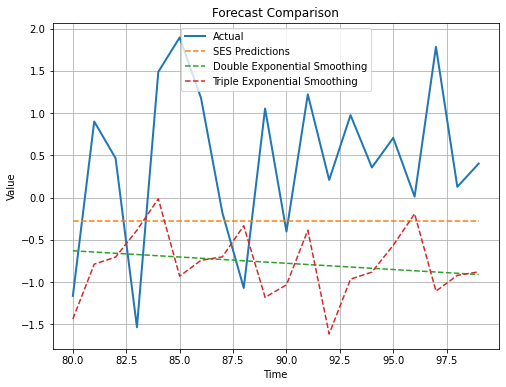

<Figure size 720x360 with 0 Axes>

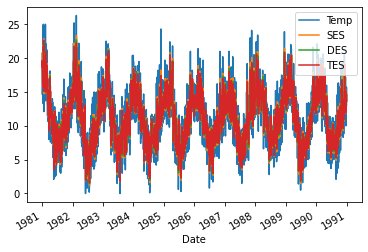

In [ ]:
# Plotting the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.plot(test_data, label='Actual', linewidth=2)
plt.plot(pred_ses, label='SES Predictions', linestyle='--')
plt.plot(pred_double, label='Double Exponential Smoothing', linestyle='--')
plt.plot(pred_triple, label='Triple Exponential Smoothing', linestyle='--')
plt.legend()
plt.title("Forecast Comparison")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
data[['Temp', 'SES', 'DES', 'TES']].plot()
plt.show()

## Forecasting Using Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Create time feature

In [ ]:
data['Date'] = np.arange(len(data))
X = data[['Date']]
y = data['Temp']

### Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Train model

In [ ]:
model = LinearRegression().fit(X_train, y_train)
data['Regression_Pred'] = model.predict(X)

In [ ]:
y_pred = model.predict(X_test)
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 3.40
Mean Squared Error (MSE): 17.05
Root Mean Squared Error (RMSE): 4.13
R-squared: -0.01


### Plot

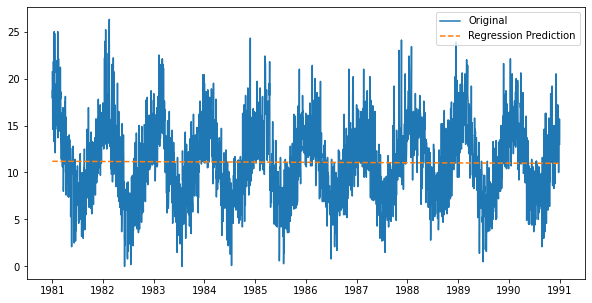

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['Regression_Pred'], label='Regression Prediction',
linestyle='dashed')
plt.legend()
plt.show()

## Autoregressive (AR) Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

### Fit AR model with lag=5

1.   List item
2.   List item



In [ ]:
model_ar = AutoReg(data['Temp'], lags=5).fit()
data['AR_Pred'] = model_ar.predict(start=0, end=len(data)-1)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [ ]:
# Replace this with your actual data
# Example: 100 random data points (you should use your 'Temp' column)
np.random.seed(0)
data = pd.DataFrame({'Temp': np.random.randn(100)})

# Fit AR(5) model
model_ar = AutoReg(data['Temp'], lags=5).fit()

# Predict values from t=5 to end (accounting for lag)
start = model_ar.model._hold_back  # This equals lag (5) here
end = len(data) - 1
predictions = model_ar.predict(start=start, end=end, dynamic=False)

# Store predictions in DataFrame
data['AR_Pred'] = np.nan
data.loc[predictions.index, 'AR_Pred'] = predictions

# Drop missing values for evaluation
eval_data = data.dropna()
y_true = eval_data['Temp']
y_pred = eval_data['AR_Pred']

# Evaluate
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("AR(5) Model Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

AR(5) Model Evaluation:
MAE: 0.7662
MSE: 0.9205
RMSE: 0.9594
R²: 0.0195


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


### Plot

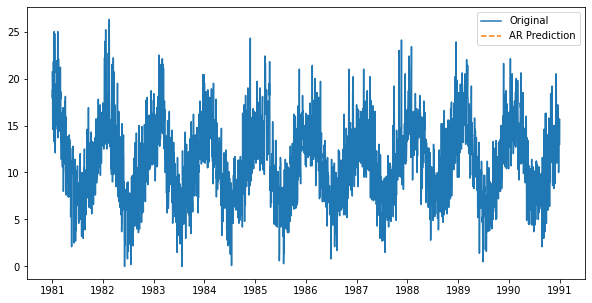

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['AR_Pred'], label='AR Prediction', linestyle='dashed')
plt.legend()
plt.show()

## Moving Average (MA) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

### Fit MA model with q=2

In [ ]:
model_ma = ARIMA(data['Temp'], order=(0, 0, 2)).fit()
data['MA_Pred'] = model_ma.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
# MA Model Predictions (in-sample)
y_true = data['Temp']
y_pred = data['MA_Pred']

# Ensure no NaN values
mask = ~y_pred.isna()

# Apply mask for valid data
mae = mean_absolute_error(y_true[mask], y_pred[mask])
mse = mean_squared_error(y_true[mask], y_pred[mask])
rmse = np.sqrt(mse)
r2 = r2_score(y_true[mask], y_pred[mask])

# Print Evaluation metrics
print("MA Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MA Model Evaluation:
MAE: 2.23
MSE: 7.99
RMSE: 2.83
R²: 0.52


### Plot

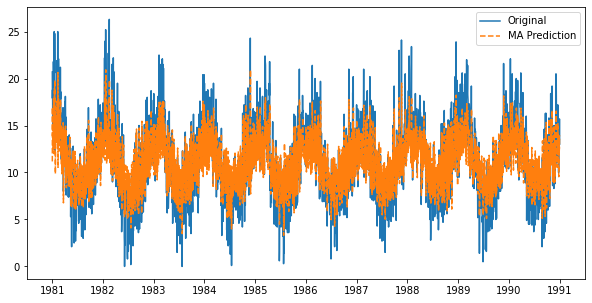

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['Temp'], label='Original')
plt.plot(data['MA_Pred'], label='MA Prediction', linestyle='dashed')
plt.legend()
plt.show()

## Multiplicative Seasonality

In [ ]:
data = pd.read_csv('shampoo.csv', parse_dates=['Month'], index_col='Month')
data.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


### Visualize data

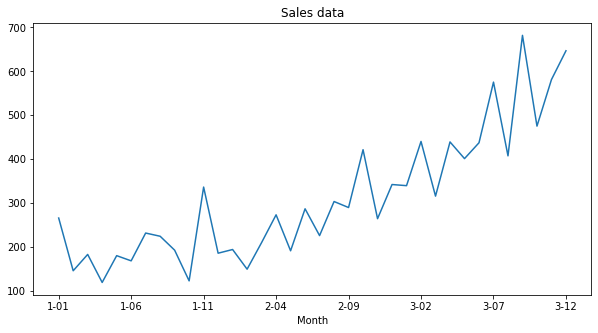

In [ ]:
data['Sales'].plot(title='Sales data', figsize=(10, 5))
plt.show()

### Decompose time series

In [ ]:
result = seasonal_decompose(data['Sales'], model='multiplicative', period=10)

### Plot components

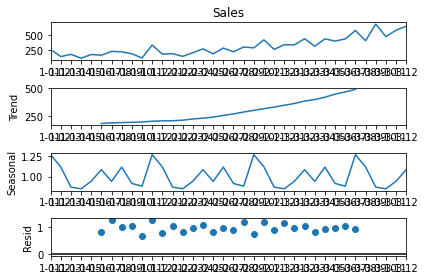

In [ ]:
result.plot()
plt.show()

## Moving Average for Smoothing and Forecasting

### Compute moving averages

In [ ]:
data['MA_7'] = data['Sales'].rolling(window=7).mean()
data['MA_30'] = data['Sales'].rolling(window=30).mean()
data['MA_90'] = data['Sales'].rolling(window=90).mean()

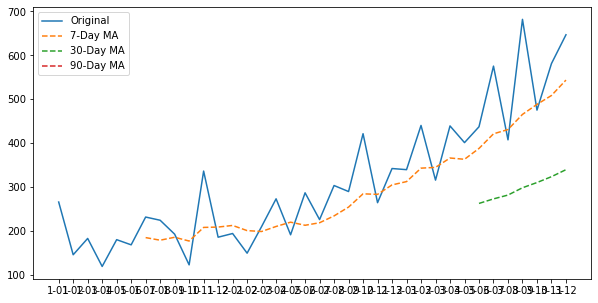

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Sales'], label='Original')
plt.plot(data['MA_7'], label='7-Day MA', linestyle='dashed')
plt.plot(data['MA_30'], label='30-Day MA', linestyle='dashed')
plt.plot(data['MA_90'], label='90-Day MA', linestyle='dashed')
plt.legend()
plt.show()

## Exponential Smoothing (Single, Double, Triple)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

### Single Exponential Smoothing with alpha=0.5

In [ ]:
model1 = SimpleExpSmoothing(data['Sales']).fit(smoothing_level=0.5, optimized=False)
data['SES'] = model1.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### Double Exponential Smoothing with trend

In [ ]:
model2 = ExponentialSmoothing(data['Sales'], trend='mul').fit()
data['DES'] = model2.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


### Triple Exponential Smoothing with seasonality

In [ ]:
model3 = ExponentialSmoothing(data['Sales'], trend='add', seasonal='mul', seasonal_periods=10).fit()
data['TES'] = model3.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<Figure size 720x360 with 0 Axes>

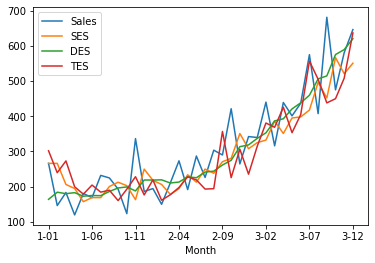

In [ ]:
# Plot
plt.figure(figsize=(10,5))
data[['Sales', 'SES', 'DES', 'TES']].plot()
plt.show()

## Forecasting Using Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Create time feature

In [ ]:
data['Month'] = np.arange(len(data))
X = data[['Month']]
y = data['Sales']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Train model
model = LinearRegression().fit(X_train, y_train)
data['Regression_Pred'] = model.predict(X)

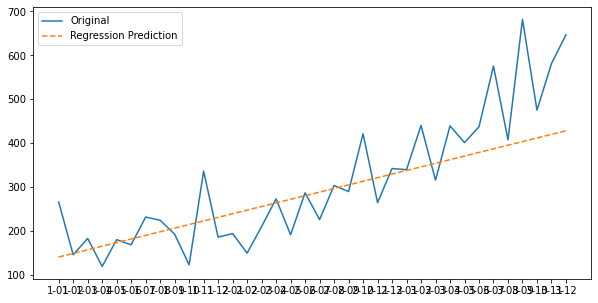

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Sales'], label='Original')
plt.plot(data['Regression_Pred'], label='Regression Prediction',
linestyle='dashed')
plt.legend()
plt.show()

## Autoregressive (AR) Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

### Fit AR model with lag=5

In [ ]:
model_ar = AutoReg(data['Sales'], lags=5).fit()
data['AR_Pred'] = model_ar.predict(start=0, end=len(data)-1)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


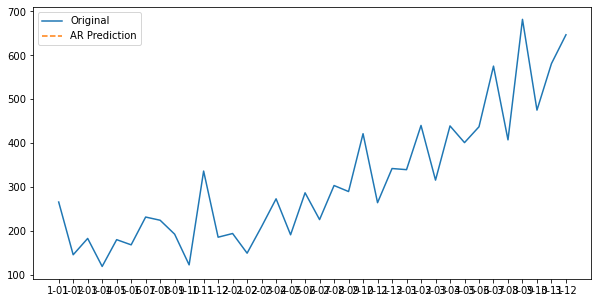

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Sales'], label='Original')
plt.plot(data['AR_Pred'], label='AR Prediction', linestyle='dashed')
plt.legend()
plt.show()

## Moving Average (MA) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

### Fit MA model with q=2

In [ ]:
model_ma = ARIMA(data['Sales'], order=(0, 0, 2)).fit()
data['MA_Pred'] = model_ma.fittedvalues

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


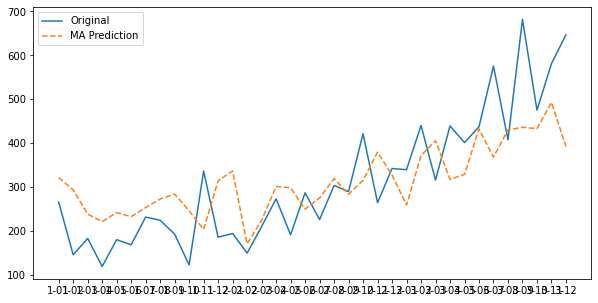

In [ ]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Sales'], label='Original')
plt.plot(data['MA_Pred'], label='MA Prediction', linestyle='dashed')
plt.legend()
plt.show()

In [ ]:
model_ma = ARIMA(data['Sales'], order=(0, 0, 3)).fit()
data['MA_Pred2'] = model_ma.fittedvalues

## **RESULT:**

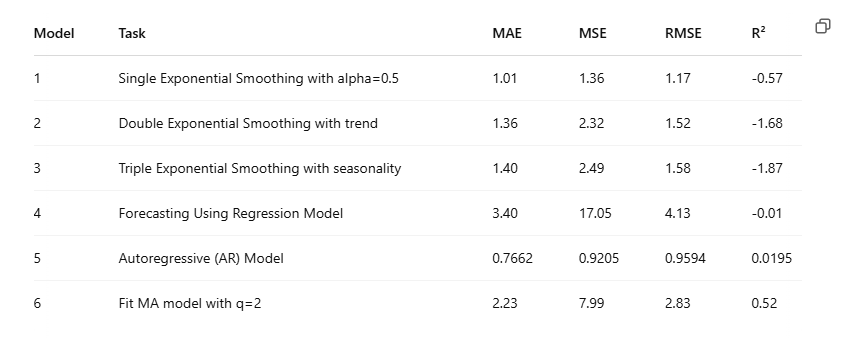

Based on the evaluation of various time series forecasting models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²), the Autoregressive (AR) model demonstrated the best overall performance. It achieved the lowest error values with an MAE of 0.7662, MSE of 0.9205, and RMSE of 0.9594, indicating high accuracy in its predictions. Although the Moving Average (MA) model with q=2 recorded the highest R² value of 0.52 suggesting it explains more variance in the data the AR model still offers a better balance of low error and acceptable R² (0.0195). Therefore, considering the error metrics as the primary criteria for selection, the Autoregressive model is recommended as the most suitable forecasting model among the ones evaluated.